In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 로이터 기사 데이터셋을 로딩합니다.
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


C:\Users\oga88\anaconda3\lib\site-packages\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\oga88\anaconda3\lib\site-packages\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[0]

3

In [13]:
# 데이터의 준비
def vectorize_sequences(sequences, dimension= 10000):
    results = np.zeros((len(sequences),dimension))
    
    #0 으로 채워주고 공간에 글이 있으면 1로 표현
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
        
    return results

#데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [14]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [15]:
#라벨 데이터의 엔코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(labels):
        results[i, sequences] = 1
        
    return results

    one_hot_train_labels = to_one_hot(train_labels)
    one_hot_test_labels = to_one_hot(test_labels)

In [17]:
# categorical 데이터로 변환하기      원 핫 인코딩을 하면 0과 1로 글과 아닌것을 표현하는데 1을 숫자로 읽지 말라고 하기 위해서 카테고리 테이터로 변환

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [20]:
 model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [21]:
# 훈련데이터의 준비

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 9s 33ms/step - loss: 3.0607 - accuracy: 0.4436 - val_loss: 1.6670 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4320 - accuracy: 0.7042 - val_loss: 1.2825 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0687 - accuracy: 0.7666 - val_loss: 1.1270 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8409 - accuracy: 0.8175 - val_loss: 1.0235 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6745 - accuracy: 0.8557 - val_loss: 0.9739 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5190 - accuracy: 0.8915 - val_loss: 0.9606 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4075 - accuracy: 0.9139 - val_loss: 0.9277 - val_accuracy: 0.8050
Epoch 8/20
16

In [23]:
# 학습 결과를 가져온다. 
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

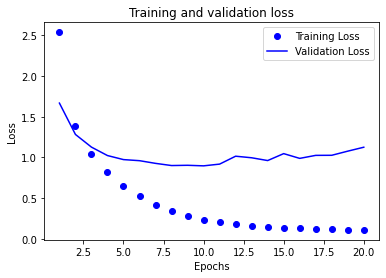

In [25]:
# 결과를 시각화 한다. 
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

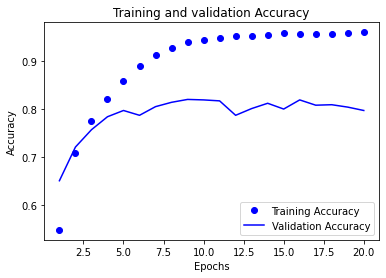

In [26]:
# 결과를 시각화 한다. 
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()